<a href="https://colab.research.google.com/github/lionneight/Data-Types-in-Python/blob/lionn8/Penerapan%20Recommendation%20System%20Pada%20E-Learning%20Platform%20Menggunakan%20Content%20Based%20Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import data

In [59]:
import pandas as pd

In [60]:
elearning = pd.read_csv("courserafree.csv", index_col=False)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


exploratory data analysis

In [61]:
elearning.sample(5)

,url,price,institution,title,skills you will gain,css-1qajodb,ratings,reviews,level type duration
877,https://www.coursera.org/learn/science-literacy,Free,University of Alberta,Science Literacy,"Strategy and Operations, Data Analysis, Commun...",Skills you'll gain:,4.4,(189 reviews),Beginner · Course · 1-3 Months
653,https://www.coursera.org/learn/tsi-math-prep,Free,University of North Texas,College Math Prep,"Mathematics, Financial Accounting, Research an...",Skills you'll gain:,4.2,(39 reviews),Beginner · Course · 1-4 Weeks
493,https://www.coursera.org/learn/audio-engineering,Free,University of Rochester,Fundamentals of Audio and Music Engineering: P...,"Mathematics, Computer Graphic Techniques, Comp...",Skills you'll gain:,4.6,(512 reviews),Mixed · Course · 1-3 Months
974,https://www.coursera.org/learn/pds,Free,Universidade Estadual de Campinas,Processamento Digital de Sinais - Amostragem,"Mathematics, Data Analysis, Matlab, Data Analy...",Skills you'll gain:,4.7,(187 reviews),Mixed · Course · 1-3 Months
507,https://www.coursera.org/learn/quantitative-cu...,Free,University of Illinois at Urbana-Champaign,Customer Insights: Quantitative Techniques,"Product Development, Entrepreneurship, Market ...",Skills you'll gain:,3.8,(27 reviews),Mixed · Course · 1-3 Months


In [62]:
elearning.isnull().sum()

url                      0
price                   26
institution              0
 title                   0
skills you will gain    86
css-1qajodb             86
ratings                 26
reviews                 26
level type duration      0
dtype: int64

In [63]:
elearningc = elearning.copy()

In [64]:
elearningc.head()

,url,price,institution,title,skills you will gain,css-1qajodb,ratings,reviews,level type duration
0,https://www.coursera.org/learn/indigenous-canada,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",Skills you'll gain:,4.8,(18.8k reviews),Mixed · Course · 1-3 Months
1,https://www.coursera.org/learn/financial-marke...,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",Skills you'll gain:,4.8,(22.5k reviews),Beginner · Course · 1-3 Months
2,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",Skills you'll gain:,4.9,(33.4k reviews),Mixed · Course · 1-3 Months
3,https://www.coursera.org/learn/sciwrite,Free,Stanford University,Writing in the Sciences,"Writing, Communication",Skills you'll gain:,4.9,(6.6k reviews),Beginner · Course · 1-3 Months
4,https://www.coursera.org/learn/introduction-ps...,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",Skills you'll gain:,4.9,(23.3k reviews),Beginner · Course · 1-3 Months


In [65]:
elearningc.drop(elearningc.columns[[0,1,2,5,6,7,8]], axis = 1, inplace = True)

In [66]:
elearningc.head()

,title,skills you will gain
0,Indigenous Canada,"Business Psychology, Communication, History, E..."
1,Financial Markets,"Business Psychology, Data Analysis, Market (Ec..."
2,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness"
3,Writing in the Sciences,"Writing, Communication"
4,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,..."


In [67]:
elearningc.isnull().sum()

 title                   0
skills you will gain    86
dtype: int64

In [68]:
elearningc['skills you will gain'].fillna('-', inplace=True)

In [69]:
elearningc.isnull().sum()

 title                  0
skills you will gain    0
dtype: int64

In [70]:
import numpy as np

In [71]:
import seaborn as sns

In [72]:
import matplotlib.pyplot as plt

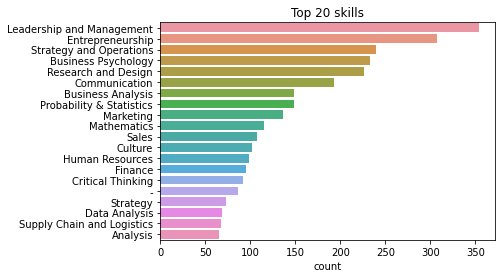

In [73]:
lst = np.hstack(elearningc['skills you will gain'].str.split(',').values)
lst = [i.strip().replace('.', '') for i in lst]
dct = {i: lst.count(i) for i in set(lst)}
skills = pd.DataFrame.from_dict(dct, orient='index').rename(columns={0: 'count'}).sort_values(by='count', ascending=False).head(20)
sns.barplot(data=skills, x='count', y=skills.index)
plt.title('Top 20 skills');

data preparation

In [74]:
elearningc['skills you will gain'] = elearningc['skills you will gain'].str.split(',')

In [75]:
elearningc.head()

,title,skills you will gain
0,Indigenous Canada,"[Business Psychology, Communication, History..."
1,Financial Markets,"[Business Psychology, Data Analysis, Market ..."
2,The Science of Well-Being,"[Gratitude, Meditation, Planning, Mindfulness]"
3,Writing in the Sciences,"[Writing, Communication]"
4,Introduction to Psychology,"[Business Psychology, Psychology, Psychologi..."


In [76]:
elearningc = elearningc.explode('skills you will gain', ignore_index=True)

In [77]:
elearningc.head(10)

,title,skills you will gain
0,Indigenous Canada,Business Psychology
1,Indigenous Canada,Communication
2,Indigenous Canada,History
3,Indigenous Canada,Entrepreneurship
4,Indigenous Canada,Research and Design
5,Indigenous Canada,Culture
6,Indigenous Canada,Leadership and Management
7,Indigenous Canada,Marketing
8,Indigenous Canada,Storytelling
9,Indigenous Canada,Theoretical Computer Science


In [78]:
elearningc['skills you will gain'].value_counts()

 Leadership and Management                          347
 Entrepreneurship                                   234
 Research and Design                                187
 Strategy and Operations                            177
 Business Analysis                                  144
                                                   ... 
 Geostatistics                                        1
 Exercise                                             1
 Generally Accepted Accounting Principles (GAAP)      1
 Content Marketing                                    1
Product Marketing                                     1
Name: skills you will gain, Length: 695, dtype: int64

In [79]:
elearningc_cross_table = pd.crosstab(elearningc['\xa0title'], elearningc['skills you will gain'])

In [80]:
elearningc_cross_table.sample(5)

skills you will gain,.Properties,3d Modeling,Account Management,Accounting,Accounting Software,Accounts Payable and Receivable,Adaptability,Advertising,Advertising Sales,Agile Management,...,Tailored Access Operations,Teaching,Theoretical Computer Science,Time Management,Unix Shells,User Research,Virtual Reality,Visual Design,Web Development,Writing
title,,,,,,,,,,,,,,,,,,,,,
Exploring Renewable Energy Schemes,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"Clinical Kidney, Pancreas and Islet Transplantation",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ART of the MOOC: Arte Público y Pedagogía,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
计算机组成 Computer Organization,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pensamiento científico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


make recommendation

jaccard similarity

In [81]:
Financial_Markets	= elearningc_cross_table.loc['Financial Markets'].values

Information_System_Auditing = elearningc_cross_table.loc['Information Systems Auditing, Controls and Assurance'].values

The_Global_Financial_Crisis = elearningc_cross_table.loc['The Global Financial Crisis'].values

In [82]:
Financial_Markets

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
Information_System_Auditing

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
The_Global_Financial_Crisis

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
from sklearn.metrics import jaccard_score

In [86]:
print(jaccard_score(Financial_Markets,Information_System_Auditing))

0.20833333333333334


In [87]:
print(jaccard_score(Financial_Markets,The_Global_Financial_Crisis))

0.2608695652173913


In [88]:
print(jaccard_score(Information_System_Auditing,The_Global_Financial_Crisis))

0.38461538461538464


In [89]:
from scipy.spatial.distance import pdist,squareform

In [90]:
# calculate pairwise distance using pdist with jaccard metric
jaccard_distances = pdist(elearningc_cross_table, metric='jaccard')

# format distance vector into distance matrix using squareform
jaccard_matrix = squareform(jaccard_distances)

# create similarity array
jaccard_similarity_array = 1 - jaccard_matrix

In [91]:
# create similarity dataframe 
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, 
                                     index=elearningc_cross_table.index, 
                                     columns=elearningc_cross_table.index)

In [92]:
jaccard_similarity_df.head()

title,#talkmentalillness,2.- El Cálculo - Modelo Cuadrático,3.- El Cálculo - Modelo Cúbico,3D CAD Fundamental,4.- El Cálculo - Otros Modelos,A Brief History of Human Spaceflight,A Business Approach to Sustainable Landscape Restoration,A Circular Economy of Metals: Towards a Sustainable Societal Metabolism,A Journey through Western Christianity: from Persecuted Faith to Global Religion (200 - 1650),A Law Student's Toolkit,...,离散数学概论 Discrete Mathematics Generality,莊子─人情 (Zhuangzi─Between People),营养与健康,計算機程式設計 (Computer Programming),计算机组成 Computer Organization,计算机辅助翻译原理与实践 Principles and Practice of Computer-Aided Translation,论文写作初阶（Academic Writing and Research）,데이터 과학자의 도구 상자,컨볼루션 신경망,파이썬 단기집중과정
title,,,,,,,,,,,,,,,,,,,,,
#talkmentalillness,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2.- El Cálculo - Modelo Cuadrático,0.0,1.000000,0.333333,0.066667,0.250000,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,0.111111,0.222222
3.- El Cálculo - Modelo Cúbico,0.0,0.333333,1.000000,0.090909,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3D CAD Fundamental,0.0,0.066667,0.090909,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4.- El Cálculo - Otros Modelos,0.0,0.250000,0.500000,0.111111,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [93]:
elearning_name = 'Financial Markets'
elearning_similarities = jaccard_similarity_df.loc[elearning_name].sort_values(ascending=False)
elearning_similarities.head(6)

 title
Financial Markets                                 1.000000
Financing and Investing in Infrastructure         0.285714
The Global Financial Crisis                       0.260870
Administração Financeira                          0.260870
Mercados financeiros                              0.259259
Planificación y gestión estratégica para Pymes    0.250000
Name: Financial Markets, dtype: float64

mea

In [94]:
from sklearn.metrics import mean_absolute_error

In [95]:
ecourse_actual = elearningc_cross_table.loc['Financial Markets'].values
ecourse_prediction1 = elearningc_cross_table.loc['Financing and Investing in Infrastructure'].values
ecourse_prediction2 = elearningc_cross_table.loc['The Global Financial Crisis'].values
ecourse_prediction3 = elearningc_cross_table.loc['Administração Financeira'].values
ecourse_prediction4 = elearningc_cross_table.loc['Mercados financeiros'].values
ecourse_prediction5 = elearningc_cross_table.loc['Planificación y gestión estratégica para Pymes'].values

mea_1 = mean_absolute_error(ecourse_actual, ecourse_prediction1)
mea_2 = mean_absolute_error(ecourse_actual, ecourse_prediction2)
mea_3 = mean_absolute_error(ecourse_actual, ecourse_prediction3)
mea_4 = mean_absolute_error(ecourse_actual, ecourse_prediction4)
mea_5 = mean_absolute_error(ecourse_actual, ecourse_prediction5)
mea_total = mea_1 + mea_2 + mea_3 + mea_4 + mea_5

print("mea1 =", mean_absolute_error(ecourse_actual, ecourse_prediction1))
print("mea2 =", mean_absolute_error(ecourse_actual, ecourse_prediction2))
print("mea3 =", mean_absolute_error(ecourse_actual, ecourse_prediction3))
print("mea4 =", mean_absolute_error(ecourse_actual, ecourse_prediction4))
print("mea5 =", mean_absolute_error(ecourse_actual, ecourse_prediction5))

mea_jaccard_similarity = mea_total/5
print("Mean absolute error dari Jaccard Similarity sebesar", mea_jaccard_similarity)

mea1 = 0.02877697841726619
mea2 = 0.02446043165467626
mea3 = 0.02446043165467626
mea4 = 0.02877697841726619
mea5 = 0.030215827338129497
Mean absolute error dari Jaccard Similarity sebesar 0.02733812949640288


cosine similarity

In [96]:
elearningc_cross_table.head()

skills you will gain,.Properties,3d Modeling,Account Management,Accounting,Accounting Software,Accounts Payable and Receivable,Adaptability,Advertising,Advertising Sales,Agile Management,...,Tailored Access Operations,Teaching,Theoretical Computer Science,Time Management,Unix Shells,User Research,Virtual Reality,Visual Design,Web Development,Writing
title,,,,,,,,,,,,,,,,,,,,,
#talkmentalillness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.- El Cálculo - Modelo Cuadrático,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.- El Cálculo - Modelo Cúbico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3D CAD Fundamental,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.- El Cálculo - Otros Modelos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
Financial_Markets	= elearningc_cross_table.loc['Financial Markets'].values.reshape(1, -1)

Indigenous_Canada = elearningc_cross_table.loc['Indigenous Canada'].values.reshape(1, -1)

In_The_Studio = elearningc_cross_table.loc['In the Studio: Postwar Abstract Painting'].values.reshape(1, -1)

In [98]:
Financial_Markets

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [99]:
Indigenous_Canada

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [100]:
In_The_Studio

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
print(cosine_similarity(Indigenous_Canada,In_The_Studio))

[[0.71269665]]


In [103]:
print(cosine_similarity(Financial_Markets,In_The_Studio))

[[0.1490712]]


In [104]:
print(cosine_similarity(Financial_Markets,Indigenous_Canada))

[[0.17928429]]


In [105]:
elearningc_cross_table.head()

skills you will gain,.Properties,3d Modeling,Account Management,Accounting,Accounting Software,Accounts Payable and Receivable,Adaptability,Advertising,Advertising Sales,Agile Management,...,Tailored Access Operations,Teaching,Theoretical Computer Science,Time Management,Unix Shells,User Research,Virtual Reality,Visual Design,Web Development,Writing
title,,,,,,,,,,,,,,,,,,,,,
#talkmentalillness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.- El Cálculo - Modelo Cuadrático,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.- El Cálculo - Modelo Cúbico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3D CAD Fundamental,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.- El Cálculo - Otros Modelos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# create list of courses enjoyed
list_of_course_enjoyed = ['Art & Ideas: Teaching with Themes', 'Indigenous Canada', 'In the Studio: Postwar Abstract Painting'] 
# create a subset of only the courses the user has enjoyed
course_enjoyed_df = elearningc_cross_table.reindex(list_of_course_enjoyed)

# create user profile
user_prof = course_enjoyed_df.mean()

In [107]:
course_enjoyed_df

skills you will gain,.Properties,3d Modeling,Account Management,Accounting,Accounting Software,Accounts Payable and Receivable,Adaptability,Advertising,Advertising Sales,Agile Management,...,Tailored Access Operations,Teaching,Theoretical Computer Science,Time Management,Unix Shells,User Research,Virtual Reality,Visual Design,Web Development,Writing
title,,,,,,,,,,,,,,,,,,,,,
Art & Ideas: Teaching with Themes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Indigenous Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
In the Studio: Postwar Abstract Painting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
user_prof

skills you will gain
 .Properties            0.0
 3d Modeling            0.0
 Account Management     0.0
 Accounting             0.0
 Accounting Software    0.0
                       ... 
User Research           0.0
Virtual Reality         0.0
Visual Design           0.0
Web Development         0.0
Writing                 0.0
Length: 695, dtype: float64

In [109]:
# find subset of elearning_cross_table that does not include courses in list_of_courses_enjoyed
ecourse_cross_table_subset = elearningc_cross_table.drop(list_of_course_enjoyed, axis=0)

In [110]:
ecourse_cross_table_subset.sample(3)

skills you will gain,.Properties,3d Modeling,Account Management,Accounting,Accounting Software,Accounts Payable and Receivable,Adaptability,Advertising,Advertising Sales,Agile Management,...,Tailored Access Operations,Teaching,Theoretical Computer Science,Time Management,Unix Shells,User Research,Virtual Reality,Visual Design,Web Development,Writing
title,,,,,,,,,,,,,,,,,,,,,
Data Science in Stratified Healthcare and Precision Medicine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doing Clinical Research: Biostatistics with the Wolfram Language,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trabajo en equipo y creatividad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
from sklearn.metrics.pairwise import cosine_similarity

In [112]:
# calculate the cosine similarity and wrap it in a DataFrame
similarity_array = cosine_similarity(user_prof.values.reshape(1, -1), ecourse_cross_table_subset)
similarity_df = pd.DataFrame(similarity_array.T, index=ecourse_cross_table_subset.index, columns=["similarity_score"])

In [113]:
similarity_array

array([[0.        , 0.        , 0.        , 0.08111071, 0.        ,
        0.        , 0.        , 0.10259784, 0.57353933, 0.23414645,
        0.        , 0.40147753, 0.49669963, 0.        , 0.        ,
        0.        , 0.41039134, 0.47691048, 0.58248237, 0.50783338,
        0.56195149, 0.42059551, 0.26490647, 0.1300665 , 0.36842105,
        0.        , 0.        , 0.        , 0.19867985, 0.07647191,
        0.28097574, 0.21497231, 0.2580927 , 0.41502868, 0.30779351,
        0.        , 0.47721357, 0.56428809, 0.        , 0.10375717,
        0.        , 0.31544663, 0.        , 0.        , 0.28097574,
        0.        , 0.06622662, 0.24210006, 0.60833033, 0.        ,
        0.41039134, 0.        , 0.20519567, 0.22941573, 0.        ,
        0.        , 0.09365858, 0.47691048, 0.        , 0.05735393,
        0.10259784, 0.15389675, 0.        , 0.20519567, 0.        ,
        0.        , 0.        , 0.        , 0.20519567, 0.39019949,
        0.45883147, 0.25649459, 0.30779351, 0.41

In [114]:
similarity_df.sample(10)

,similarity_score
title,
Antimicrobial resistance - theory and methods,0.000000
發展心理學：哲學觀與方法論 (Developmental Psychology: Philosophical Bases and Methodology),0.000000
Cyber-Physical Systems: Modeling and Simulation,0.000000
Introduction to Advanced Vibrations,0.000000
Large Marine Ecosystems: Assessment and Management,0.346844
Skepticism,0.346844
Write Your First Novel,0.527220
Fundamentals of particle accelerator technology (NPAP MOOC),0.000000
International Humanitarian Law in Theory and Practice,0.000000


In [115]:
similarity_df.sort_values(by='similarity_score', ascending=False).head(5)

,similarity_score
title,
Sexing the Canvas: Art and Gender,0.688247
Formación docente basada en la práctica para desarrollar habilidades del siglo XXI,0.613139
American Deaf Culture,0.608330
Heritage under Threat,0.606977
Music and Social Action,0.587957


mea

In [116]:
ecourse_actual_1 = elearningc_cross_table.loc['Art & Ideas: Teaching with Themes'].values.reshape(1, -1)
ecourse_actual_2 = elearningc_cross_table.loc['Indigenous Canada'].values.reshape(1, -1)
ecourse_actual_3 = elearningc_cross_table.loc['In the Studio: Postwar Abstract Painting'].values.reshape(1, -1)
ecourse_prediction_1 = elearningc_cross_table.loc['Sexing the Canvas: Art and Gender'].values.reshape(1, -1)
ecourse_prediction_2 = elearningc_cross_table.loc['Formación docente basada en la práctica para desarrollar habilidades del siglo XXI'].values.reshape(1, -1)
ecourse_prediction_3 = elearningc_cross_table.loc['American Deaf Culture'].values.reshape(1, -1)
ecourse_prediction_4 = elearningc_cross_table.loc['Heritage under Threat'].values.reshape(1, -1)
ecourse_prediction_5 = elearningc_cross_table.loc['Music and Social Action'].values.reshape(1, -1)

mea_1_1 = mean_absolute_error(ecourse_actual_1, ecourse_prediction_1)
mea_1_2 = mean_absolute_error(ecourse_actual_1, ecourse_prediction_2)
mea_1_3 = mean_absolute_error(ecourse_actual_1, ecourse_prediction_3)
mea_1_4 = mean_absolute_error(ecourse_actual_1, ecourse_prediction_4)
mea_1_5 = mean_absolute_error(ecourse_actual_1, ecourse_prediction_5)

mea_total1 = mea_1_1 + mea_1_2 + mea_1_3 + mea_1_4 + mea_1_5

mea_2_1 = mean_absolute_error(ecourse_actual_2, ecourse_prediction_1)
mea_2_2 = mean_absolute_error(ecourse_actual_2, ecourse_prediction_2)
mea_2_3 = mean_absolute_error(ecourse_actual_2, ecourse_prediction_3)
mea_2_4 = mean_absolute_error(ecourse_actual_2, ecourse_prediction_4)
mea_2_5 = mean_absolute_error(ecourse_actual_2, ecourse_prediction_5)

mea_total2 = mea_2_1 + mea_2_2 + mea_2_3 + mea_2_4 + mea_2_5 

mea_3_1 = mean_absolute_error(ecourse_actual_3, ecourse_prediction_1)
mea_3_2 = mean_absolute_error(ecourse_actual_3, ecourse_prediction_2)
mea_3_3 = mean_absolute_error(ecourse_actual_3, ecourse_prediction_3)
mea_3_4 = mean_absolute_error(ecourse_actual_3, ecourse_prediction_4)
mea_3_5 = mean_absolute_error(ecourse_actual_3, ecourse_prediction_5)

mea_total3 = mea_3_1 + mea_3_2 + mea_3_3 + mea_3_4 + mea_3_5

print("mea1 ",mea_total1)
print("mea2 ",mea_total2)
print("mea3 ",mea_total3)

mea_total = mea_total1/5 + mea_total2/5 + mea_total3/5
mea_cosine_similarity = mea_total/3
print("Mean absolute error Cosine Similarity sebesar", mea_cosine_similarity)


mea1  0.07194244604316546
mea2  0.09640287769784173
mea3  0.060431654676258995
Mean absolute error Cosine Similarity sebesar 0.01525179856115108
